In [91]:
library('igraph')
library('dplyr')

<h2>Question 2</h2>

In [107]:
correlation_graph <- read.table('../finance_data/correlation_edgelist.txt')

In [108]:
g <- graph_from_data_frame(correlation_graph, directed=FALSE)

In [109]:
E(g)$weight=as.numeric(correlation_graph[,3])

In [110]:
is.connected(g)
writeLines(paste("Number of edges: ", ecount(g)))
writeLines(paste("Number of vertices: ", vcount(g)))
writeLines(paste("Diameter: ", diameter(g)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  121771
Number of vertices:  494
Diameter:  1.54827216684821


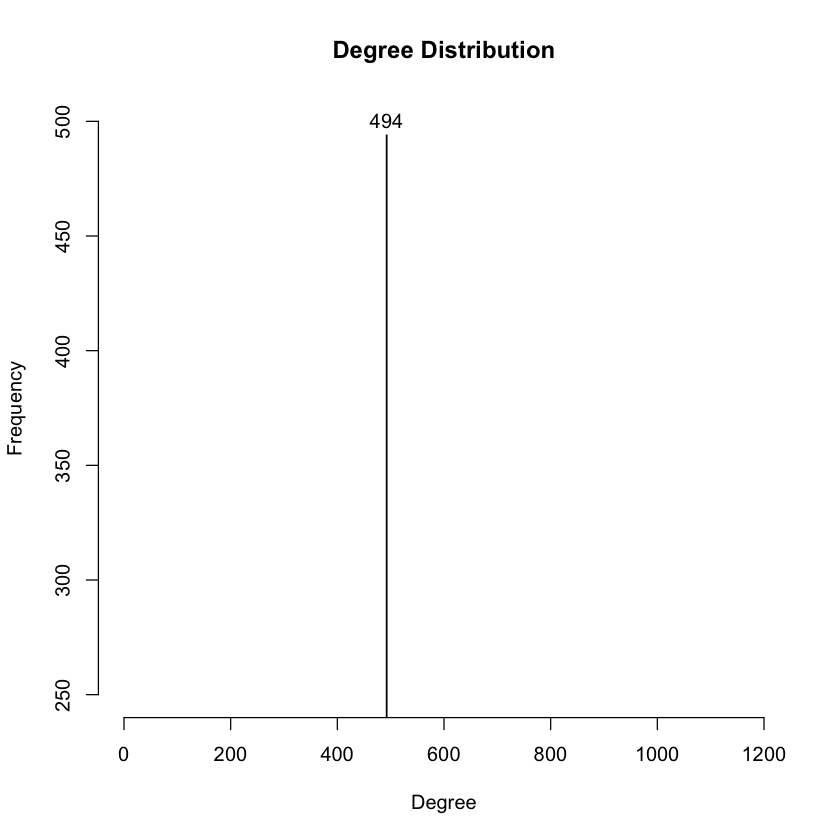

In [116]:
degree_distribution <- degree(g)
histogram <- hist(degree_distribution, breaks=seq(from=490, to=500, by=1),
                  xlim=c(0,1200), ylim=c(250,500), 
                  xlab="Degree",ylab="Frequency", main="Degree Distribution")
text(histogram$mids,histogram$counts,labels=histogram$counts, adj=c(0.5, -0.5))

In [117]:
histogram

$breaks
 [1] 490 491 492 493 494 495 496 497 498 499 500

$counts
 [1]   0   0 494   0   0   0   0   0   0   0

$density
 [1] 0 0 1 0 0 0 0 0 0 0

$mids
 [1] 490.5 491.5 492.5 493.5 494.5 495.5 496.5 497.5 498.5 499.5

$xname
[1] "degree_distribution"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

<h3>Unnormalized weights</h3>

In [118]:
unnormalized_correlation_graph <- read.table('../finance_data/unnormalized_correlation_edgelist.txt')

In [119]:
ug <- graph_from_data_frame(unnormalized_correlation_graph, directed=FALSE)

In [120]:
E(ug)$weight=as.numeric(unnormalized_correlation_graph[,3])

In [121]:
is.connected(ug)
writeLines(paste("Number of edges: ", ecount(ug)))
writeLines(paste("Number of vertices: ", vcount(ug)))
writeLines(paste("Diameter: ", diameter(ug)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  121771
Number of vertices:  494
Diameter:  1.53478788180027


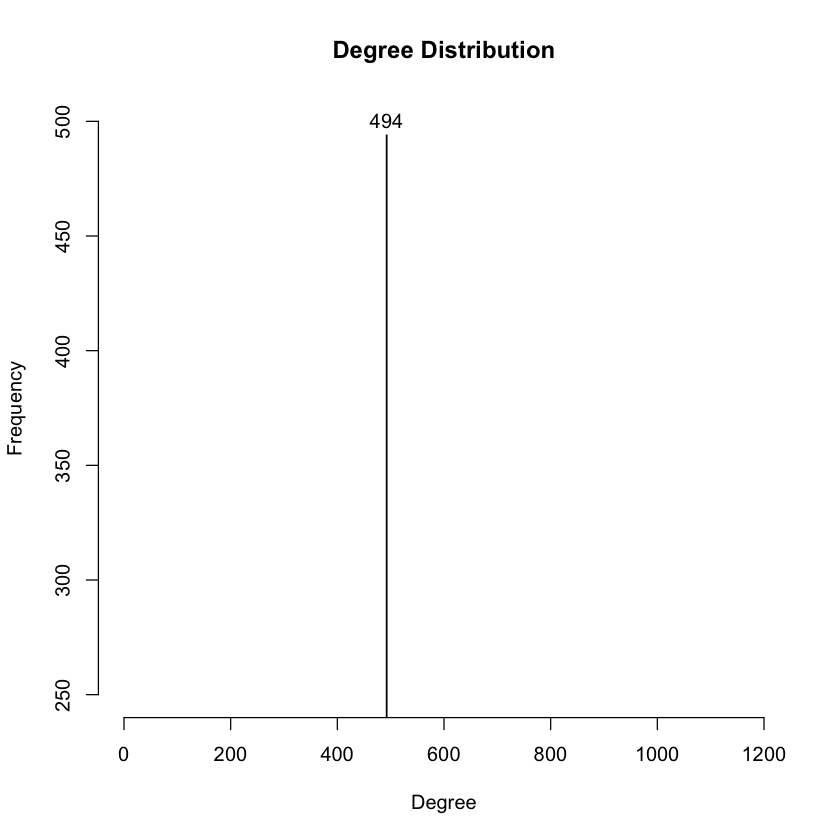

In [122]:
unnormalized_degree_distribution <- degree(ug)
histogram2 <- hist(unnormalized_degree_distribution, breaks=seq(from=490, to=500, by=1),
                  xlim=c(0,1200), ylim=c(250,500),
                  xlab="Degree",ylab="Frequency", main="Degree Distribution")
text(histogram2$mids,histogram2$counts,labels=histogram2$counts, adj=c(0.5, -0.5))

In [123]:
histogram2

$breaks
 [1] 490 491 492 493 494 495 496 497 498 499 500

$counts
 [1]   0   0 494   0   0   0   0   0   0   0

$density
 [1] 0 0 1 0 0 0 0 0 0 0

$mids
 [1] 490.5 491.5 492.5 493.5 494.5 495.5 496.5 497.5 498.5 499.5

$xname
[1] "unnormalized_degree_distribution"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

<h2>Question 3</h2>

In [124]:
g_mst <- mst(g, algorithm="prim")

In [125]:
is.connected(g_mst)
writeLines(paste("Number of edges: ", ecount(g_mst)))
writeLines(paste("Number of vertices: ", vcount(g_mst)))
writeLines(paste("Diameter: ", diameter(g_mst)))
#plot(g, vertex.label=NA, vertex.size=3)

[1] TRUE

Number of edges:  493
Number of vertices:  494
Diameter:  27.3576195646759


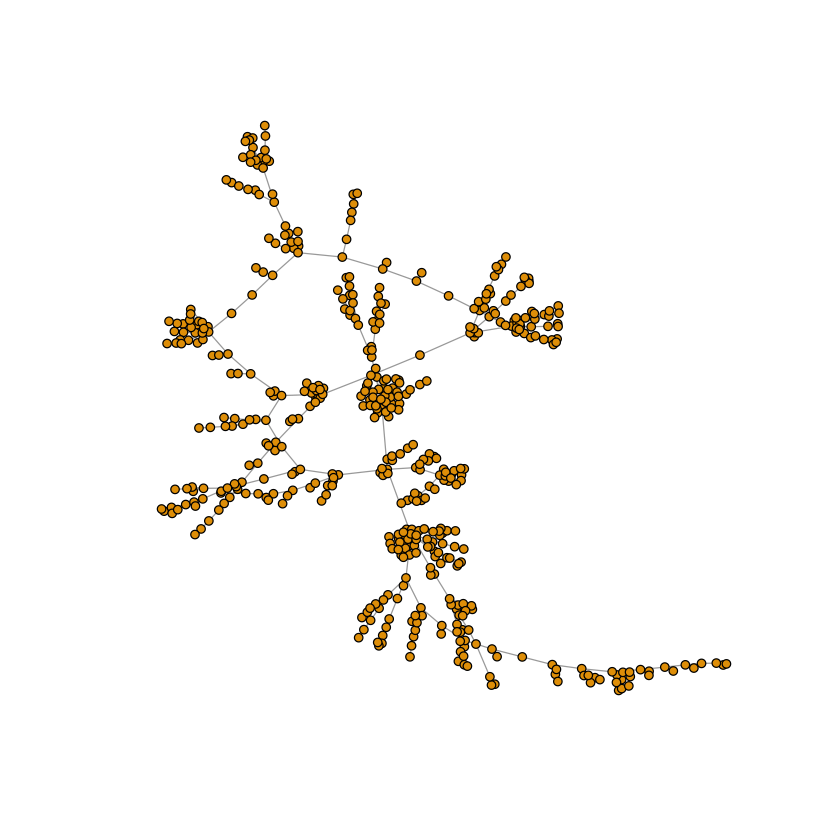

In [126]:
plot(g_mst, vertex.size=3, vertex.label=NA, layout=layout.fruchterman.reingold)

In [127]:
V(g_mst)

+ 494/494 vertices, named, from 09dc5fe:
  [1] AAL   AAP   AAPL  ABBV  ABC   ABT   ACN   ADBE  ADI   ADM   ADP   ADS  
 [13] ADSK  AEE   AEP   AES   AET   AFL   AGN   AIG   AIV   AIZ   AJG   AKAM 
 [25] ALB   ALK   ALL   ALLE  ALXN  AMAT  AMD   AME   AMG   AMGN  AMP   AMT  
 [37] AMZN  AN    ANTM  AON   APA   APC   APD   APH   ARE   ARNC  ATVI  AVB  
 [49] AVGO  AVY   AWK   AXP   AYI   AZO   BA    BAC   BAX   BBBY  BBT   BBY  
 [61] BCR   BDX   BEN   BF.B  BHI   BIIB  BK    BLK   BLL   BMY   BRK.B BSX  
 [73] BWA   BXP   C     CA    CAG   CAH   CAT   CB    CBG   CBOE  CBS   CCI  
 [85] CCL   CELG  CERN  CF    CHD   CHK   CHRW  CHTR  CI    CINF  CL    CLX  
 [97] CMA   CMCSA CME   CMG   CMI   CMS   CNC   CNP   COF   COG   COH   COL  
[109] COO   COP   COST  COTY  CPB   CRM   CSCO  CSX   CTAS  CTL   CTSH  CTXS 
+ ... omitted several vertices

In [128]:
name_sectors <- read.table('../finance_data/Name_sector.csv', sep=',', header=TRUE)

In [129]:
sectors <- group_by(name_sectors, Sector)

In [130]:
summarize(sectors, count=n())

Sector,count
Consumer Discretionary,85
Consumer Staples,37
Energy,34
Financials,66
Health Care,60
Industrials,65
Information Technology,70
Materials,25
Real Estate,31
Telecommunication Services,4


In [131]:
colors = palette(rainbow(nrow(unique(summarize(sectors)))))
color_palette = cbind(summarize(sectors), colors)
typeof(color_palette)

[1] "list"

In [132]:
name_sectors_colors <- left_join(name_sectors, color_palette, by='Sector')
typeof(name_sectors_colors)

[1] "list"

In [133]:
print(which(name_sectors_colors$Symbol == 'ZTS'))

[1] 505


In [134]:
name_sectors_colors[which(name_sectors_colors$Symbol == 'ZTS'), 3]

[1] #00FF2E
11 Levels: #002EFF #00B9FF #00FF2E #00FFB9 #5D00FF #5DFF00 #E800FF ... red

In [135]:
vertex_colors = rep("#000000", length(V(g_mst)))
for (v in V(g_mst)$name) {
   vertex_colors[which(V(g_mst)$name == v)] = as.character(name_sectors_colors[which(name_sectors_colors$Symbol == v), 3]) 
}

In [136]:
unique(vertex_colors)

[1] "#00FFB9" "red"     "#00B9FF" "#00FF2E" "#FF8B00" "#FF008B" "#5DFF00"
 [8] "#5D00FF" "#002EFF" "#E8FF00" "#E800FF"

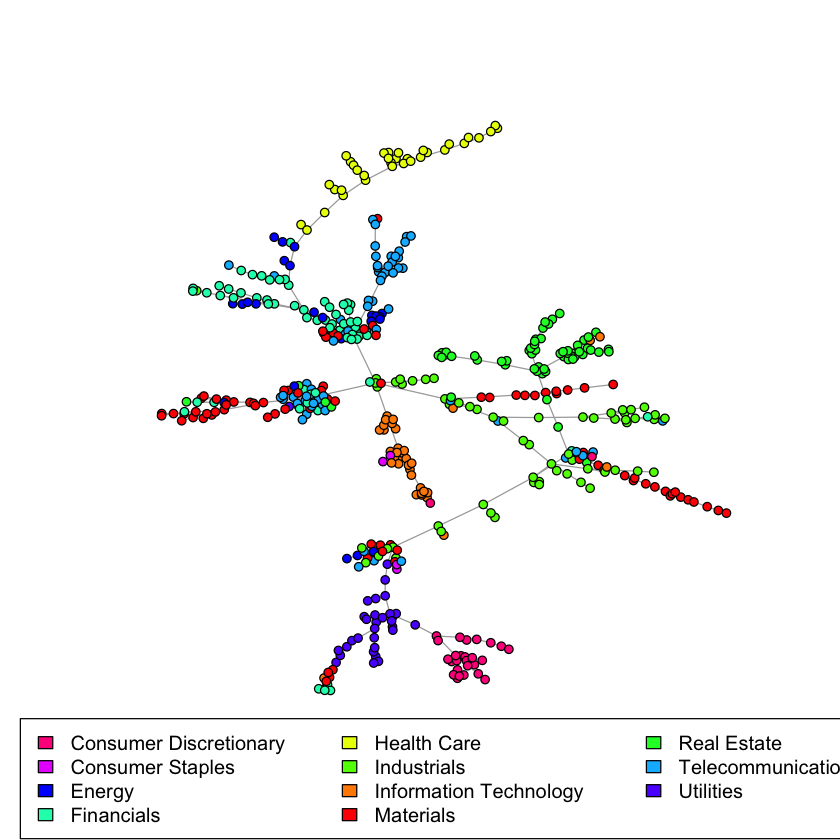

In [138]:
plot(g_mst, vertex.size=3, vertex.label=NA, vertex.color=vertex_colors, layout=layout.fruchterman.reingold)
par(xpd=TRUE)
legend(x=-1.5, y=-1.1, legend=unlist(color_palette[1]), fill=unlist(color_palette[2]), ncol=3)

<h2>Question 4</h2>